In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss
warnings.filterwarnings("ignore")

In [ ]:
df_train=pd.read_csv("Training.csv")
del df_train['Unnamed: 133']

In [ ]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
df_train.isnull().values.any()

False

In [ ]:
num_diseases=len(set(list(df_train['prognosis'])))

In [ ]:
df_train.loc[df_train['prognosis']=='Fungal infection']

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4756,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4797,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4838,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
df_train['prognosis'].value_counts()

Dimorphic hemmorhoids(piles)               120
Fungal infection                           120
Bronchial Asthma                           120
Peptic ulcer diseae                        120
Malaria                                    120
Paralysis (brain hemorrhage)               120
Hyperthyroidism                            120
GERD                                       120
AIDS                                       120
Allergy                                    120
Hepatitis D                                120
(vertigo) Paroymsal  Positional Vertigo    120
Drug Reaction                              120
Hepatitis C                                120
Hepatitis E                                120
Hypothyroidism                             120
Osteoarthristis                            120
Diabetes                                   120
Jaundice                                   120
Hypertension                               120
hepatitis A                                120
Alcoholic hep

In [ ]:
no_of_symptoms=[]
for i in df_train.index:
  no_of_symptoms.append(sum(df_train.loc[i,:]==1))
max(no_of_symptoms)

17

In [ ]:
len(no_of_symptoms)

4920

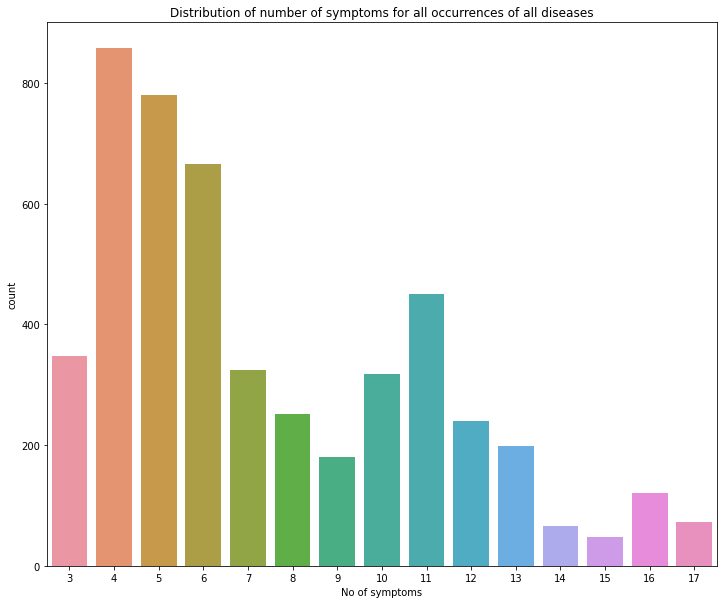

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(no_of_symptoms);
plt.xlabel("No of symptoms");
plt.title("Distribution of number of symptoms for all occurrences of all diseases");

In [ ]:
set(list(df_train['prognosis'][np.where(np.array(no_of_symptoms)==3)[0]]))

{'AIDS',
 'Acne',
 'Allergy',
 'Fungal infection',
 'Gastroenteritis',
 'Heart attack',
 'Paralysis (brain hemorrhage)',
 'Urinary tract infection'}

In [ ]:
set(list(df_train['prognosis'][np.where(np.array(no_of_symptoms)==17)[0]]))

{'Common Cold'}

In [ ]:
ha_symptoms={}
df_ha=df_train.loc[df_train['prognosis']=='Heart attack']
df_ha=df_ha.reset_index()
for i in range(120):
  for j in list(df_train.columns):
    if(df_ha[j][i]==1):
      ha_symptoms[j]=ha_symptoms.get(j,0)+1

ha_symptoms

{'breathlessness': 108, 'chest_pain': 114, 'sweating': 108, 'vomiting': 108}

In [ ]:
common_cold_symptoms={}
df_cc=df_train.loc[df_train['prognosis']=='Common Cold']
df_cc=df_cc.reset_index()
for i in range(120):
  for j in list(df_train.columns):
    if(df_cc[j][i]==1):
      common_cold_symptoms[j]=common_cold_symptoms.get(j,0)+1

common_cold_symptoms

{'chest_pain': 120,
 'chills': 114,
 'congestion': 120,
 'continuous_sneezing': 114,
 'cough': 114,
 'fatigue': 114,
 'headache': 114,
 'high_fever': 114,
 'loss_of_smell': 120,
 'malaise': 114,
 'muscle_pain': 120,
 'phlegm': 120,
 'redness_of_eyes': 120,
 'runny_nose': 120,
 'sinus_pressure': 120,
 'swelled_lymph_nodes': 114,
 'throat_irritation': 120}

In [ ]:
df_categorical=df_train.loc[:]


In [ ]:
def Cramers_V(x,y,bias_correction=True):
  '''x,y are series objects or numpy arrays (1D)
  0=no relationship
  <=0.2=weak
  <=0.3=moderate
  >0.3= strong'''

  confusion_matrix=pd.crosstab(x,y)
  chi2=ss.chi2_contingency(confusion_matrix)[0]
  n=confusion_matrix.sum().sum()
  phi2=chi2/n
  r,c=confusion_matrix.shape
  if(bias_correction):
    phi2corr=max(0,phi2-((c-1)*(r-1))/(n-1))
    rcorr=r-((r-1)**2/(n-1))
    ccorr=c-((c-1)**2/(n-1))
    return np.sqrt(phi2corr/min((ccorr-1),(rcorr-1)))
  else:
    return np.sqrt(phi2/min((r-1),(c-1)))

In [ ]:
class RBF_NN:
  def __init__(self,X,y,n_clusters,Beta=None):
    self.X=X
    self.y=y
    self.n_clusters=n_clusters
    self.kmeans=KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42,max_iter=300,n_init=10)
    self.cluster_distances=np.zeros((n_clusters,n_clusters))
    self.Beta=Beta

  def compute_distance(self,x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

  def calc_Beta(self):
    for i in range(self.n_clusters):
      for j in range(self.n_clusters):
        self.cluster_distances[i][j]=self.compute_distance(self.kmeans.cluster_centers_[i],self.kmeans.cluster_centers_[j])
    Dmax=0
    for i in self.cluster_distances:
      if(max(i)>Dmax):
        Dmax=max(i)
    Beta=np.sqrt(2*self.kmeans.cluster_centers_.shape[0])
    Beta=round(Beta/Dmax,2)
    self.Beta=Beta
    return Beta

  def RBF(self,x1,x2,Beta):
    return np.exp(-Beta*(self.compute_distance(x1,x2)))

  def compute_y(self):
    self.kmeans.fit_predict(self.X)
    beta=0
    if(self.Beta==None):
      beta=self.calc_Beta()
    else:
      beta=self.Beta
    RBF_matrix=np.zeros((self.X.shape[0],self.kmeans.cluster_centers_.shape[0]))
    for i in range(self.X.shape[0]):
      for j in range(self.kmeans.cluster_centers_.shape[0]):
        RBF_matrix[i][j]=self.RBF(self.X[i],self.kmeans.cluster_centers_[j],beta)
    Wapprox=np.linalg.inv(RBF_matrix.T@RBF_matrix)@RBF_matrix.T@self.y
    self.weights=Wapprox
    return beta,RBF_matrix@Wapprox,Wapprox

  def compute_test_y(self,X_test):
    Weights=self.weights
    RBF_matrix=np.zeros((X_test.shape[0],self.kmeans.cluster_centers_.shape[0]))
    for i in range(X_test.shape[0]):
      for j in range(self.kmeans.cluster_centers_.shape[0]):
        RBF_matrix[i][j]=self.RBF(X_test[i],self.kmeans.cluster_centers_[j],self.Beta)
    return RBF_matrix@Weights



  
  





  
  


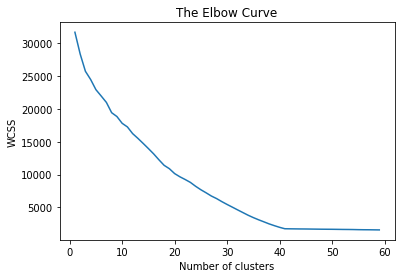

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 60):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0,max_iter=300,n_init=10)# Note the initialisation used
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 60), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

X_train=df_train.iloc[:,:-1].values
y_train=pd.get_dummies(df_train.iloc[:,-1]).iloc[:].values
y_true_train=np.zeros((X_train.shape[0]))
for i in range(X_train.shape[0]):
  y_true_train[i]=np.argmax(y_train[i])
classifier=RBF_NN(X_train,y_train,41)
Beta,y_matrix_returned,weights=classifier.compute_y()
y_pred2=np.zeros((X_train.shape[0]))
for i in range(X_train.shape[0]):
  y_pred2[i]=np.argmax(y_matrix_returned[i])
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_true_train,y_pred2))
print(classification_report(y_true_train,y_pred2))
print(accuracy_score(y_true_train, y_pred2))


[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       120
         1.0       1.00      1.00      1.00       120
         2.0       1.00      1.00      1.00       120
         3.0       1.00      1.00      1.00       120
         4.0       1.00      1.00      1.00       120
         5.0       1.00      1.00      1.00       120
         6.0       1.00      1.00      1.00       120
         7.0       1.00      1.00      1.00       120
         8.0       1.00      1.00      1.00       120
         9.0       1.00      1.00      1.00       120
        10.0       1.00      1.00      1.00       120
        11.0       1.00      1.00      1.00       120
        12.0       1.00      1.00      1.00       120
        13.0       1.00      1.00      1.00       1

In [ ]:
df_test=pd.read_csv("Testing.csv")
X_test=df_test.iloc[:,:-1].values
y_test=pd.get_dummies(df_test.iloc[:,-1]).iloc[:].values
y_true_test=np.zeros((X_test.shape[0]))

for i in range(X_test.shape[0]):
  y_true_test[i]=np.argmax(y_test[i])
y_matrix_returned=classifier.compute_test_y(X_test)
y_pred2=np.zeros((X_test.shape[0]))
for i in range(X_test.shape[0]):
  y_pred2[i]=np.argmax(y_matrix_returned[i])
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_true_test,y_pred2))
print(classification_report(y_true_test,y_pred2))
print(accuracy_score(y_true_test, y_pred2))


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         1
         8.0       1.00      1.00      1.00         1
         9.0       1.00      1.00      1.00         1
        10.0       1.00      1.00      1.00         1
        11.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1
        15.0   

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
print(X_train.shape)
y_train.shape
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))


(4920, 132)
[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       1.00      1.00      1.00       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       1.00      1.00      1.00       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       1.00      1.00      1.00       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       1.00      1.00      

In [ ]:
df_test=pd.read_csv("Testing.csv")
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [ ]:
import pickle 
  
# Save the trained model as a pickle string.
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
              #  'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid2 = {'n_estimators': [46],
               'max_features': ['sqrt'],
                'max_depth': max_depth,
               'min_samples_split': [2],
               'min_samples_leaf': [1],
               'bootstrap': [False]}

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}
print(random_grid2) 

{'n_estimators': [46], 'max_features': ['sqrt'], 'max_depth': [1, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, None], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [False]}


In [ ]:
np.concatenate([X_train,X_test]).shape


(42, 132)

In [ ]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1,scoring=scoring,refit='f1')
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 485 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.7min finished


{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 36}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'criterion':['gini'],
    'max_features': ['auto'],
    'min_samples_leaf': [2],
    'min_samples_split': [10],
    'n_estimators': [1,2,3,4,5]
}
# Create a based model
rf = RandomForestClassifier()
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}
grid_search_rfc = GridSearchCV(rf, param_grid = param_grid, scoring = scoring, refit='f1',verbose=3,n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)
grid_search_rfc.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
tuned_classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_train = tuned_classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))

[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 114]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       0.95      1.00      0.98       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       1.00      1.00      1.00       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       0.95      1.00      0.98       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       0.95      1.00      0.98       1

In [ ]:
tuned_classifier=RandomForestClassifier(criterion='gini',bootstrap = True,max_features= 'auto',min_samples_leaf= 2,min_samples_split= 10,n_estimators= 1)
tuned_classifier.fit(X_train,y_train)
y_pred = tuned_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [ ]:
symptoms=np.zeros((1,132))
symptoms_list=list(df_train.columns)
itching=1
skin_rash=1
nodal_skin_eruptions=1

symptoms[0][symptoms_list.index('itching')]=1
symptoms[0][symptoms_list.index('skin_rash')]=1
symptoms[0][symptoms_list.index('nodal_skin_eruptions')]=1

tuned_classifier.predict(symptoms)

array(['Fungal infection'], dtype=object)

In [ ]:
{'chest_pain': 120,
 'chills': 114,
 'congestion': 120,
 'continuous_sneezing': 114,
 'cough': 114,
 'fatigue': 114,
 'headache': 114,
 'high_fever': 114,
 'loss_of_smell': 120,
 'malaise': 114,
 'muscle_pain': 120,
 'phlegm': 120,
 'redness_of_eyes': 120,
 'runny_nose': 120,
 'sinus_pressure': 120,
 'swelled_lymph_nodes': 114,
 'throat_irritation': 120}

In [ ]:
'breathlessness': 108, 'chest_pain': 114, 'sweating': 108, 'vomiting': 108

In [ ]:
np.random.randint(132)

88